In [2]:
%run ../utilities/utilities.py
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [3]:
data = pd.read_csv("../_data/in_vitro/DESeq2/3D7_FUP_DESeq2merge.csv")
data = data.fillna(1)
anno = pd.read_csv("../_data/Annotations/PFD3D7_annos.csv", index_col='Unnamed: 0')

df_3D7_sig = data[(data['padj.3D7'] < 0.05) & (data['padj.FUP'] > 0.05) & (abs(data['log2FoldChange.3D7']) > np.log2(1.5))]
df_FUP_sig = data[(data['padj.3D7'] > 0.05) & (data['padj.FUP'] < 0.05) & (abs(data['log2FoldChange.FUP']) > np.log2(1.5))]
df_both_sig = data[(data['padj.3D7'] < 0.05) & (data['padj.FUP'] < 0.05) & (abs(data['log2FoldChange.3D7']) > np.log2(1.5)) & (abs(data['log2FoldChange.FUP']) > np.log2(1.5))]

loc_3D7 = df_3D7_sig.index.tolist()
loc_FUP = df_FUP_sig.index.tolist()
loc_both = df_both_sig.index.tolist()

data['p-value'] = "p > 0.05"
data.loc[loc_3D7, 'p-value'] = "3D7: p < 0.05"
data.loc[loc_FUP, 'p-value'] = "FUP: p < 0.05"
data.loc[loc_both, 'p-value'] = "3D7 & FUP: p < 0.05"

pal = sns.color_palette('Set1')
pal = pal.as_hex()

data['p-value'] = "p > 0.05"
data.loc[loc_3D7, 'p-value'] = "3D7: p < 0.05"
data.loc[loc_FUP, 'p-value'] = "FUP: p < 0.05"
data.loc[loc_both, 'p-value'] = "3D7 & FUP: p < 0.05"

data['color'] = 'w'
data.loc[loc_3D7, 'color'] = pal[0]
data.loc[loc_FUP, 'color'] = pal[1]
data.loc[loc_both, 'color'] = pal[3]

Text(0, 0.5, 'Log2 fold change - FUP')

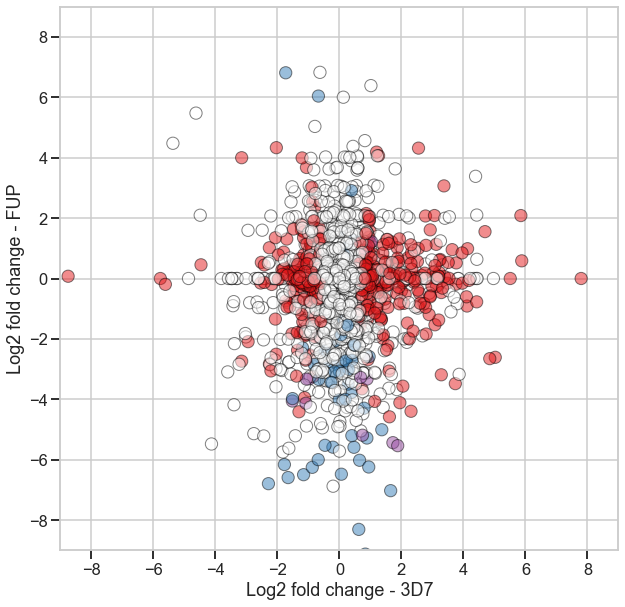

In [4]:
hpi = 3
data_sub = data[data['HPI'] == hpi]

sns.set_context('talk')
plt.figure(figsize=(10,10))
sns.set_style("whitegrid", {'axes.grid': True, 'xtick.bottom': True, 'ytick.left' : True, })

ax1 = sns.regplot(data=data_sub, x="log2FoldChange.3D7", y="log2FoldChange.FUP", fit_reg=False, 
            scatter_kws={'facecolors':data_sub['color'], 'edgecolors':'black', 'alpha' : .5, 's':150})

plt.xlim(-9,9)
plt.xlabel("Log2 fold change - 3D7")
plt.ylim(-9,9)
plt.ylabel("Log2 fold change - FUP")